In [1]:
#
# This is just a toy A/B test using PyMC. 
#


import pymc
import pymc.graph
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#
# Generate some fake data - 
#   conversions for variant A and for variant B
#
observations = 1000
true_pA = 0.60
true_pB = 0.65
conversions_a = scipy.stats.bernoulli.rvs(true_pA, size=observations)
conversions_b = scipy.stats.bernoulli.rvs(true_pB, size=observations)

#
# Define the model.
#

#
# pA = Probability that A has a 'conversion'
# Uniform on 0 to 1.
#

pA = pymc.Uniform("pA", 0, 1)
pB = pymc.Uniform("pB", 0, 1)

#
# The conversion rates for a and b modeled as bernoulli's with
#   our priors above as the p parameters (prob of success/conv.)
#   our fake data from the top of the cell as what was actually observed.
#

a = pymc.Bernoulli("a", pA, value=conversions_a, observed=True)
b = pymc.Bernoulli("b", pB, value=conversions_b, observed=True)

#
# The difference between pA and pB -- what we're after.
#

@pymc.deterministic
def diff(pA=pA, pB=pB):
    return (pB - pA)

model = pymc.Model([diff, a, b, pA, pB])



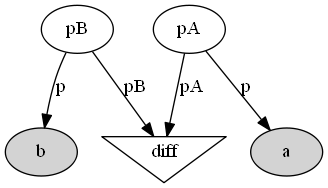

In [13]:
#
# Draw the model.
#

graph = pymc.graph.graph(model)
graph.write_png('temp_model1.png')
from IPython.display import Image
Image(filename='temp_model1.png') 


In [19]:
#
# Sample the model
#

mcmc = pymc.MCMC(model)
mcmc.sample(iter=50000, burn=10000, thin=10)

 [-----------------100%-----------------] 50000 of 50000 complete in 7.5 sec

Probability that B is better than A 0.96675


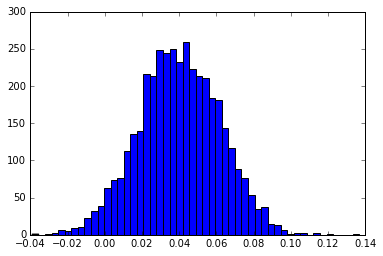

In [22]:
print("Probability that B is better than A " + str((mcmc.trace('diff')[:] > 0).mean()))
_ = plt.hist(mcmc.trace('diff')[:], bins=50)